In [2]:
import scanpy as sc
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import itertools as it
import json
import requests
import seaborn as sns
import pickle as pkl

In [3]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)
print(sc.__version__)
sc.settings.n_jobs=12

1.4.4.post1


In [6]:
path = '/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/fig3.L20C1/new.adata.6.h5ad'

In [25]:
adata = sc.read_h5ad(path)

In [28]:
counts = dict()

In [41]:
for bc in tqdm(adata.obs['barcode'].unique()):
    df = adata.obs[adata.obs['barcode'] == bc]
    v, c = np.unique(df['CellType'].values, return_counts=True)
    counts[bc] = dict(zip(v,c))

In [48]:
df = pd.DataFrame.from_dict(counts).fillna(0).T

In [51]:
df.drop('Hek293t', axis=1, inplace=True)

In [54]:
df1 = df[['Hepatocyte','Kupffer','LSEC','Lymphocyte','MSC','mc38']]
df2 = df[['Hepatocyte','Macrophage','mc38']]

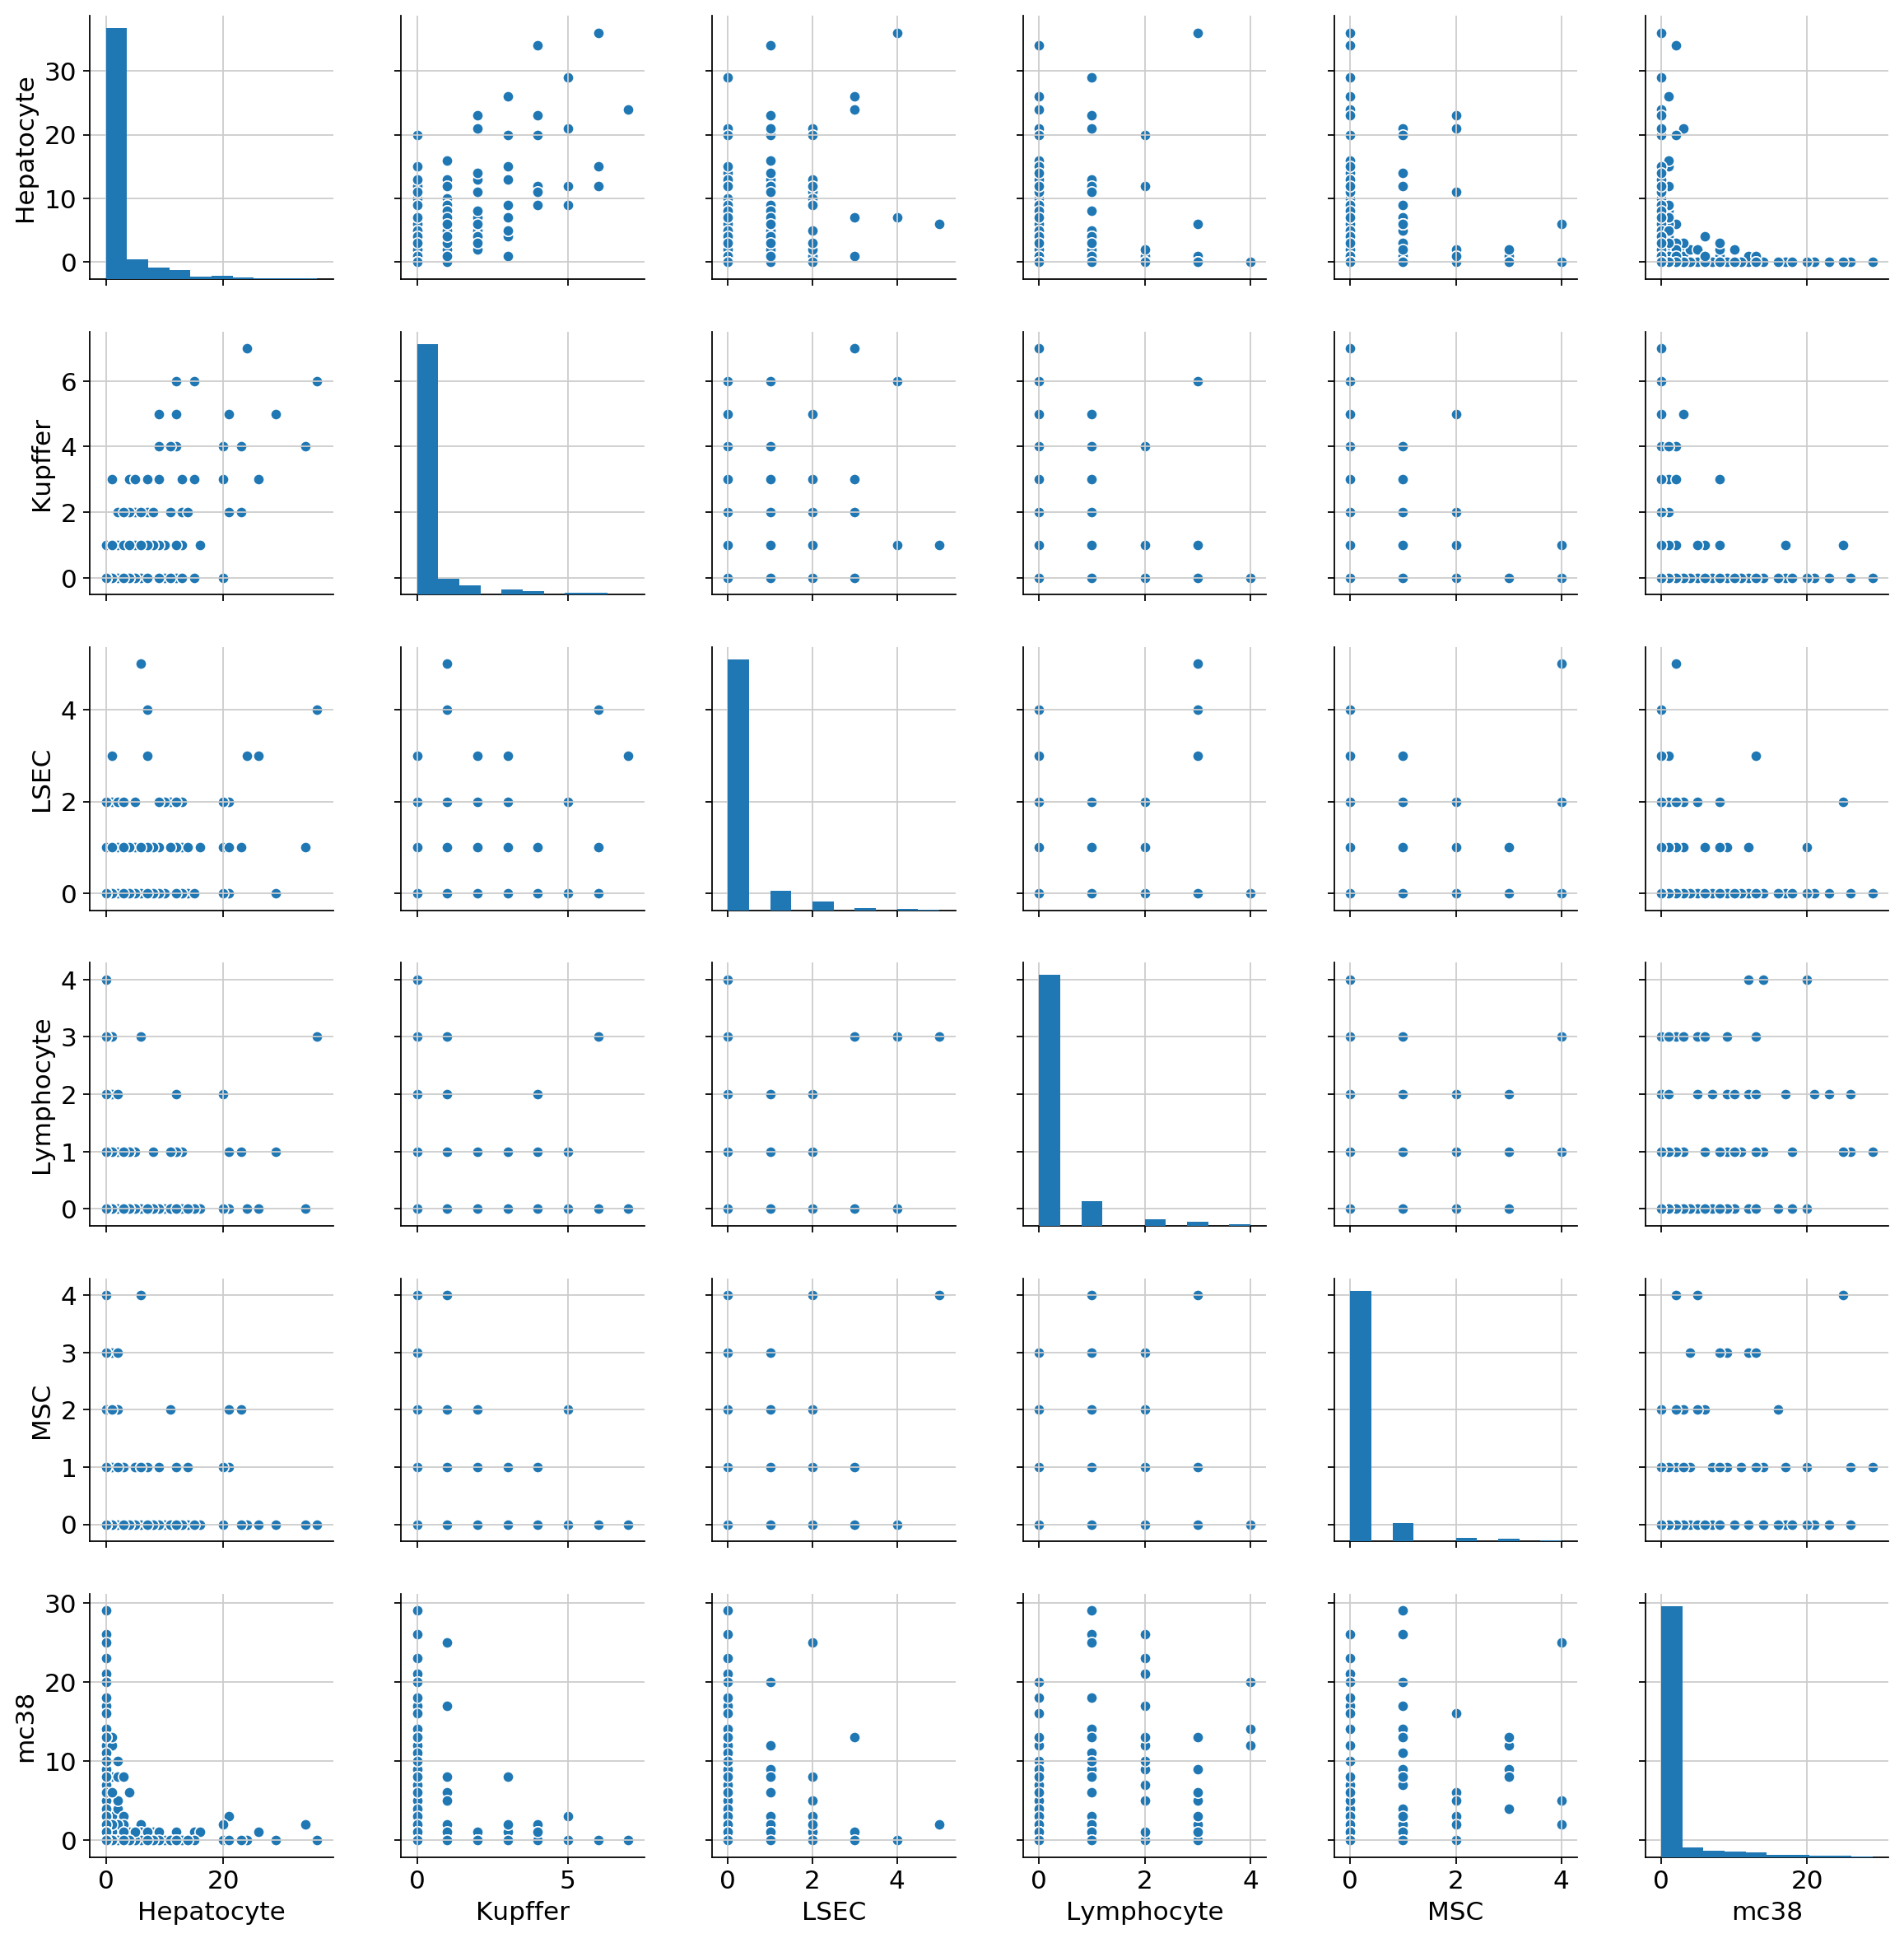

In [58]:
sns.pairplot(df1)
plt.savefig('/data/xyzeq/xyzeq/figures/pairplot.supps.svg')

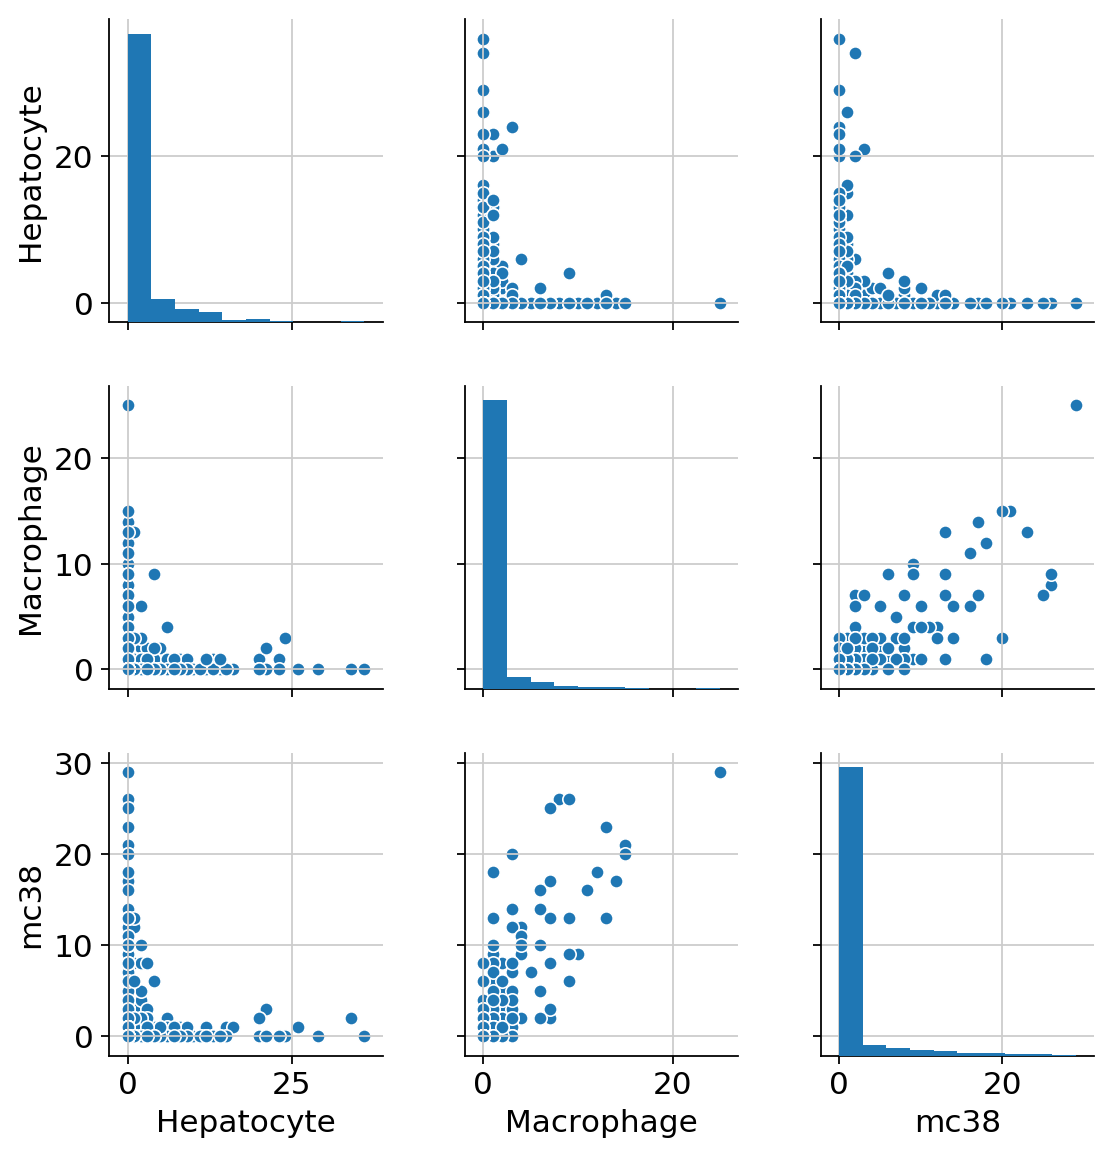

In [57]:
sns.pairplot(df2)
plt.savefig('/data/xyzeq/xyzeq/figures/pairplot.main.svg')